In [1]:
import pandas as pd
import quandl
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
%matplotlib inline

/home/saurabh/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
quandl.ApiConfig.api_key = "5K-ry2zKnKUgC4cSUyJf"
df=quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [3]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT']=((df['Adj. High']-df['Adj. Close']))/(df['Adj. Close'])*100
df['PCT_change']=((df['Adj. Close']-df['Adj. Open']))/(df['Adj. Open'])*100

df=df[['Adj. Close', 'HL_PCT','PCT_change','Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [4]:
forecast_col='Adj. Close'
df.fillna(-99999,inplace=True)

In [5]:
forecast_out=int(math.ceil(0.1*len(df)))
print(forecast_out)

343


In [6]:
df['label']=df[forecast_col].shift(-forecast_out )

In [7]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,214.005615
2004-08-20,54.322689,0.710922,7.227007,22834300.0,210.725489
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,1.886792,1.183658,9188600.0,223.309335


In [8]:
X=np.array(df.drop(['label'],1))
X=preprocessing.scale(X)
X_lately=X[-forecast_out:] # remaining 10%
X=X[:-forecast_out] # upto 90% 



df.dropna(inplace=True)
y=np.array(df['label'])
y=np.array(df['label'])
print(len(X))
print(len(y))

3081
3081


In [9]:
X_train, X_test, y_train, y_test=cross_validation.train_test_split(X, y, test_size=0.2)
clf=LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
accuracy=clf.score(X_test, y_test)
accuracy

0.8588169267233131

In [11]:
forecast_set=clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[ 965.10592183  951.09374001  978.82417394  976.11866912  986.50481785
  980.80390494  985.41589686  988.17969299  979.02441716  975.9217596
 1002.29126004  994.41738491  979.46370842  962.34278557  963.20162805
  978.26811225  977.45000575  994.88974771  998.088067   1016.29047636
 1013.88313102 1029.543831   1029.08892827 1025.32069444 1015.90234797
 1020.29411319 1019.71192319 1015.36098155 1012.31866439 1012.04302259
 1019.09424627 1009.54221695 1005.79908674  995.57522349 1016.43060678
 1013.39083829 1018.52404341 1039.77539475 1036.29326023 1034.06372859
 1037.18928271 1036.49242893 1041.09281808 1033.9352695  1034.87443486
 1036.48180357 1033.8572295  1061.49272305 1063.29497624 1073.7998
 1070.83244361 1070.65907364 1034.69178767 1026.60462678 1021.9302252
 1030.34009825 1028.57619668 1026.28315272 1039.71055248 1040.22884938
 1036.89736812 1045.28776097 1050.67896469 1050.37259614 1049.00627786
 1053.58726753 1059.44570121 1063.69500925 1066.94378555 1063.36098141
 1058.275085

In [12]:
df['Forecast']=np.nan 

In [13]:
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

In [14]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]

Text(0,0.5,'Price')

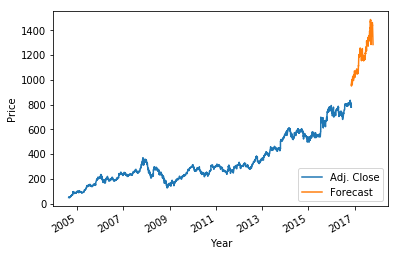

In [15]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel("Year")
plt.ylabel("Price")